In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

The datas used in this notebook were created by the previous notebook (Part2_Data_Cleaning).

## Import the Cleaned Dataset

In [2]:
pollution_o = pd.read_excel('pollution_outliers.xlsx')
pollution_No = pd.read_excel('pollution_NoOutliers.xlsx')

In [3]:
pollution_o.head()

,Unnamed: 0,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,0,-1.596267,-1.229791,-1.347143,0.345329,-0.444944,-0.071057,-0.137408,0,0,1,0,129
1,1,-1.596267,-1.160508,-1.347143,0.345329,-0.427007,-0.071057,-0.137408,0,0,1,0,148
2,2,-1.596267,-0.883375,-1.429278,0.442411,-0.409069,-0.071057,-0.137408,0,0,1,0,159
3,3,-1.596267,-0.606241,-1.429278,0.539493,-0.372993,1.212862,-0.137408,0,0,1,0,181
4,4,-1.596267,-0.606241,-1.429278,0.539493,-0.355055,2.496781,-0.137408,0,0,1,0,138


In [4]:
pollution_No.head()

,Unnamed: 0,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,0,-1.62403,-1.276489,-1.390179,0.380205,-0.554550,-0.070731,-0.141238,0,0,1,0,129
1,1,-1.62403,-1.206701,-1.390179,0.380205,-0.523464,-0.070731,-0.141238,0,0,1,0,148
2,2,-1.62403,-0.927548,-1.472689,0.477831,-0.492378,-0.070731,-0.141238,0,0,1,0,159
3,3,-1.62403,-0.648396,-1.472689,0.575458,-0.429857,1.198139,-0.141238,0,0,1,0,181
4,4,-1.62403,-0.648396,-1.472689,0.575458,-0.398771,2.467009,-0.141238,0,0,1,0,138


Looking at both these tables, we can see that both the datasets have a column that reiterate the index. We will remove these columns.

In [5]:
pollution_o.drop(columns = ['Unnamed: 0'], inplace = True)
pollution_No.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
pollution_o.head()

,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,-1.596267,-1.229791,-1.347143,0.345329,-0.444944,-0.071057,-0.137408,0,0,1,0,129
1,-1.596267,-1.160508,-1.347143,0.345329,-0.427007,-0.071057,-0.137408,0,0,1,0,148
2,-1.596267,-0.883375,-1.429278,0.442411,-0.409069,-0.071057,-0.137408,0,0,1,0,159
3,-1.596267,-0.606241,-1.429278,0.539493,-0.372993,1.212862,-0.137408,0,0,1,0,181
4,-1.596267,-0.606241,-1.429278,0.539493,-0.355055,2.496781,-0.137408,0,0,1,0,138


In [7]:
pollution_No.head()

,month,dewTemp,temp,pres,windSpeed,cumSnow,cumRain,x0_NE,x0_NW,x0_SE,x0_SW,pm2.5
0,-1.62403,-1.276489,-1.390179,0.380205,-0.554550,-0.070731,-0.141238,0,0,1,0,129
1,-1.62403,-1.206701,-1.390179,0.380205,-0.523464,-0.070731,-0.141238,0,0,1,0,148
2,-1.62403,-0.927548,-1.472689,0.477831,-0.492378,-0.070731,-0.141238,0,0,1,0,159
3,-1.62403,-0.648396,-1.472689,0.575458,-0.429857,1.198139,-0.141238,0,0,1,0,181
4,-1.62403,-0.648396,-1.472689,0.575458,-0.398771,2.467009,-0.141238,0,0,1,0,138


---

## Creating x and y parts

##### Dataset with Outliers

In [8]:
x_o = pollution_o.iloc[:, :-1].values
x_o

array([[-1.59626706, -1.22979123, -1.34714315, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59626706, -1.16050789, -1.34714315, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59626706, -0.88337455, -1.4292782 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.58830091, -1.64549124, -1.26500809, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.58830091, -1.64549124, -1.34714315, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.58830091, -1.57620791, -1.26500809, ...,  1.        ,
         0.        ,  0.        ]])

In [9]:
y_o = pollution_o.iloc[:, -1].values
y_o

array([129, 148, 159, ...,  10,   8,  12])

In [10]:
x_o.shape

(41757, 11)

In [11]:
y_o.shape

(41757,)

We can see that the x-set has 11 columns (all the features) and 41,757 rows, while the y-set has the same number of rows but only 1 columns (the target variable of PM 2.5 levels).

---

##### Dataset without Outliers

In [12]:
x_no = pollution_No.iloc[:, :-1].values
x_no

array([[-1.62402976, -1.27648884, -1.39017869, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62402976, -1.20670076, -1.39017869, ...,  0.        ,
         1.        ,  0.        ],
       [-1.62402976, -0.92754845, -1.47268865, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.61685601, -1.69521731, -1.30766873, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.61685601, -1.69521731, -1.22515878, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.61685601, -1.69521731, -1.22515878, ...,  1.        ,
         0.        ,  0.        ]])

In [13]:
y_no = pollution_No.iloc[:, -1].values
y_no

array([129, 148, 159, ...,   8,   7,  12])

In [14]:
x_no.shape

(39879, 11)

In [15]:
y_no.shape

(39879,)

This is the dataset without outliers. The x-set has 11 columns for all the features and 39,061 rows (less than the previous dataset because there are no outliers in this data). The y-set has the same number of observations and 1 column for the target variable of pollution levels.

---

## Splitting Dataset

##### Dataset with Outliers

In [16]:
from sklearn.model_selection import train_test_split

x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o, test_size = 0.2, random_state = 4)
print('Train set:', x_o_train.shape, y_o_train.shape)
print('Test set:', x_o_test.shape, y_o_test.shape)

Train set: (33405, 11) (33405,)
Test set: (8352, 11) (8352,)


This is the dataset with outliers.

The training set has 33,405 observations and the test set has 8,352 rows. This is a 80:20 split of the full dataset with outliers.

---

##### Dataset without Outliers

In [17]:
x_no_train, x_no_test, y_no_train, y_no_test = train_test_split(x_no, y_no, test_size = 0.2, random_state = 4)
print('Train set:', x_no_train.shape, y_no_train.shape)
print('Test set:', x_no_test.shape, y_no_test.shape)

Train set: (31903, 11) (31903,)
Test set: (7976, 11) (7976,)


This is the dataset without outliers.

The 80:20 split creates fewer observations for the x and y sets because this dataset is smaller (since outliers have been removed). The training set has 31,903 observations and the test set has 7,976 rows.

---

## Linear Regression

##### Data with Outliers

In [18]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_o_train, y_o_train)

LinearRegression()

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
from mlxtend.evaluate import bias_variance_decomp

y_o_train_pred = linear.predict(x_o_train)
mse = mean_squared_error(y_o_train, y_o_train_pred)
r2 = r2_score(y_o_train, y_o_train_pred)
mse, bias, var = bias_variance_decomp(linear, x_o_train, y_o_train, x_o_test, y_o_test, loss='mse', num_rounds=200, random_seed=1)

print("The model performance for training set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")


y_o_test_pred = linear.predict(x_o_test)
mse_test = mean_squared_error(y_o_test, y_o_test_pred)
r2_test = r2_score(y_o_test, y_o_test_pred)

print("The model performance for test set")
print('MSE is {}'.format(mse_test))
print('R2 score is {}'.format(r2_test))
print("\n")
print('Model Bias: %.3f' % bias)
print('Model Variance: %.3f' % var)

The model performance for training set
MSE is 5862.073312049587
R2 score is 0.26116091446318657


The model performance for test set
MSE is 5861.152821523665
R2 score is 0.2635840057066928


Model Bias: 5860.077
Model Variance: 1.996


The regression model using data with outliers, for the training set the r-square score is 0.261, which means that this model explains 26.1% of the total variation in the response variable of the pollution levels.

As for test set, it appears to be slightly higher, the r-square is 0.264, the model explains 26.4% of the total variation, only 26.4% of the data fit the regression model. 

These r-squared values are pretty low. We have also displayed the bias and variance of this model. We can see that this model has extremely high bias and low variance. A high bias means that the accuracy of the predictions is not good (as seeen by the low r-squared value). Variance is the difference between many model's predictions. A high variance may lead to overfitting. 
Since we have low variance and high bias, our model is underfitting. The predictions are close or similar to each other but they are inaccurate. When the mdoel is underfitting, we can try polynomial regression to see if that improves the fit. 

In [20]:
model_o_lin = linear.fit(x_o_train, y_o_train)
print('intercept', model_o_lin.intercept_)
print('coefficients', model_o_lin.coef_)

intercept 97.000082884244
coefficients [ -3.69566983  60.14483991 -76.53350855 -15.69013443  -9.59182274
  -2.80139247  -8.7184298  -13.14491946 -16.14575635  16.5100653
  12.78061051]


Looking at the above result, we can form a linear regression equation:

${pm2.5} = 97 + (-3.70) * {month} + 60.14 * {dewTemp} + (-76.53) * {temp} + (-15.69) * {pres} + (-9.59) * {windSpeed} + (-2.80) * {cumSnow} + (-8.72) * {cumRain} + (-13.14) * {NE} + (-16.15) * {NW} + 16.51 * {SE} + 12.78 * {SW} $

This shows that a one-month increase leads to a decrease of pm2.5 levels by 3.70 micrograms per cubic meter of air. An increase of one degree celcius in the dew point temperature leads to a decrease of 60.14 micrograms per cubic meter of air. The rest of the coefficients can be interpreted similarly. 

However, it can be seen that the temperature has the largest influence on the level of PM 2.5 where a one degree celcius increase in the temperature reduces the PM 2.5 levels by 77 micrograms per cubic meter of air. 

Interesting finding: It appears that the general temporal change is that as the month increases, the pollution level decreases by 3.70 micrograms per cubic meter of air in Beijing. It would be increasing to see if there are similar trends in other countries. This finding also has real-life influences because it could advice policymakers on the way that they can/should create pollution laws that dictate people's behaviours. For instance, policymakers can create polciies that require people to use less fuel or diesel-consuming vehicles during the earlier months of the year.

##### Data without outliers

In [21]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_no_train, y_no_train)

LinearRegression()

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

y_no_train_pred = linear.predict(x_no_train)
mse = mean_squared_error(y_no_train, y_no_train_pred)
r2 = r2_score(y_no_train, y_no_train_pred)
mse, bias, var = bias_variance_decomp(linear, x_no_train, y_no_train, x_no_test, y_no_test, loss='mse', num_rounds=200, random_seed=1)


print("The model performance for training set")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

y_no_test_pred = linear.predict(x_no_test)
mse_test = mean_squared_error(y_no_test, y_no_test_pred)
r2_test = r2_score(y_no_test, y_no_test_pred)

print("The model performance for tet set")
print('MSE is {}'.format(mse_test))
print('R2 score is {}'.format(r2_test))
print("\n")

print('Model Bias: %.3f' % bias)
print('Model Variance: %.3f' % var)

The model performance for training set
MSE is 4546.797464226827
R2 score is 0.269057350695177


The model performance for tet set
MSE is 4546.716234998728
R2 score is 0.25994075576812903


Model Bias: 4545.390
Model Variance: 1.407


The regression model above is using data without outliers, for the training set the r-square score is 0.269, which means that this model explains 26.9% of the total variation in the response variable.

As for test set, it appears to be slightly higher, the r-square is 0.260, the model explains 26% of the total variation in the response variable in pollution level.

Overall, the difference in the r-square value in the first model and the second is close to 1% which is not a big difference. Hence, we cannot make a conclusion about which dataset would make a better predictive model.

Since the r-squared for both models are still very small, which is around 25% to 27% we will try plotting with polynomial model to see if it can create a better prediction than the regression.

Looking at the bias and variance values, we see that the bias is smaller for the model without outliers indicating better accuracy of the predictions. However, there is still clear high bias and low variance showing that the model is underfitting for this data. Hence, we should try a polynomial regression.

In [23]:
model_no_lin = linear.fit(x_no_train, y_no_train)
print('intercept', model_no_lin.intercept_)
print('coefficients', model_no_lin.coef_)

intercept 91.22984639503294
coefficients [ -1.77716011  51.65660262 -62.74351484 -12.48946785  -9.05515444
  -2.04359978  -7.73471943 -13.40565394 -15.05812489  18.08747348
  10.37630534]


Looking at the above result, we can form a linear regression equation:

${pm2.5} = 92 + (-1.78) * {month} + 51.7 * {dewTemp} + (-62.74) * {temp} + (-12.49) * {pres} + (-9.06) * {windSpeed} + (-2.04) * {cumSnow} + (-7.73) * {cumRain} + (-13.41) * {NE} + (-15.06) * {NW} + 18.08 * {SE} + 10.38 * {SW} $

This shows that a one-month increase leads to a decrease of pm2.5 levels by 1.78 micrograms per cubic meter of air. An increase of one degree celcius in the dew point temperature leads to a decrease of 51.7 micrograms per cubic meter of air. The rest of the coefficients can be interpreted similarly. 

However, it can be seen that the temperature has the largest influence on the level of PM 2.5 where a one degree celcius increase in the temperature reduces the PM 2.5 levels by 62.74 micrograms per cubic meter of air. The dew point temperature also has a large effect on the pm 2.5 levels where a one degree celcius increase in the dew point temperature leads to a 51.7 micrograms per cubic meter of air increase in pm 2.5 levels.

Interesting finding: Similar to the previous equation, it appears that the general temporal change is that as the month increases, the pollution level decreases by 1.78 micrograms per cubic meter of air in Beijing. It would be increasing to see if there are similar trends in other countries. This finding also has real-life influences because it could advice policymakers on the way that they can/should create pollution laws that dictate people's behaviours. For instance, policymakers can create policies that require people to use less fuel or diesel-consuming vehicles during the earlier months of the year. Also, it can be seen that the wind directions also have an influence on pollution levels. We would prefer the ind to be coming from the north east or north west because the trend is for pollution levels to decrease in these cases in Beijing. This also gives us an idea of what areas are most polluted (the south east and south west of Beijing). This information gives policymakers an idea of the places they should creatte pollution laws. 

---

## Polynomial Regression

##### Data with Outliers

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

poly_features_o = PolynomialFeatures(degree = 3)
x_o_train_poly = poly_features_o.fit_transform(x_o_train)
poly_model_o = LinearRegression()
poly_model_o.fit(x_o_train_poly, y_o_train)

LinearRegression()

In [25]:
y_o_train_predict = poly_model_o.predict(x_o_train_poly)
rmse_train_o = np.sqrt(mean_squared_error(y_o_train, y_o_train_predict))
r2_train_o = r2_score(y_o_train, y_o_train_predict)


print("The model performance for training set")
print('MSE is {}'.format(rmse_train_o))
print('R2 score is {}'.format(r2_train_o))
print("\n")

y_o_test_predict = poly_model_o.predict(poly_features_o.fit_transform(x_o_test))
rmse_test_o = np.sqrt(mean_squared_error(y_o_test, y_o_test_predict))
r2_test_o = r2_score(y_o_test, y_o_test_predict)
mse, bias, var = bias_variance_decomp(poly_model_o, x_o_train_poly, y_o_train, poly_features_o.fit_transform(x_o_test), y_o_test, loss='mse', num_rounds=200, random_seed=1)

print("The model performance for test set")
print('MSE is {}'.format(rmse_test_o))
print('R2 score is {}'.format(r2_test_o))
print("\n")

print('Model Bias: %.3f' % bias)
print('Model Variance: %.3f' % var)

The model performance for training set
MSE is 66.35347761427535
R2 score is 0.4881025688318068


The model performance for test set
MSE is 64.01163206657482
R2 score is 0.4851769682085548


Model Bias: 4099.939
Model Variance: 32.689


The polynomial regression model is using data with outliers, for the training set the r-square score is 0.488, which means that this model explains 48.8% of the total variation in the target variable.
As for test set, it appears to be almost the same, the r-square is 0.485, the model explains 48.5% of the total variation in the target variable.

Compared with the linear regression model, the r-square in the polynomial model have a higher r-square value. It increases by 20% for both train and test set. Looking at the values of bias and variance, we can see that this model (like the others) has high bias and low variance. However, we can see that the bias has decreased whereas the variance has increased from the linear regression model. This shows that the accuracy has increased and, while the variance has increased from the linear regresison model, it is still low. Clearly, the model is still underfitting but it is a better fit for this dataset than the linear regression model.

Now will see how the results are using the data without outliers.

##### Data without outlier

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

poly_features_no = PolynomialFeatures(degree = 3)
x_no_train_poly = poly_features_no.fit_transform(x_no_train)
poly_model_no = LinearRegression()
poly_model_no.fit(x_no_train_poly, y_no_train)

LinearRegression()

In [27]:
y_no_train_predict = poly_model_no.predict(x_no_train_poly)
rmse_train_no = np.sqrt(mean_squared_error(y_no_train, y_no_train_predict))
r2_train_no = r2_score(y_no_train, y_no_train_predict)

print("The model performance for training set")
print('MSE is {}'.format(rmse_train_no))
print('R2 score is {}'.format(r2_train_no))
print("\n")

y_no_test_predict = poly_model_no.predict(poly_features_no.fit_transform(x_no_test))
rmse_test_no = np.sqrt(mean_squared_error(y_no_test, y_no_test_predict))
r2_test_no = r2_score(y_no_test, y_no_test_predict)
mse, bias, var = bias_variance_decomp(poly_model_no, x_no_train_poly, y_no_train, poly_features_no.fit_transform(x_no_test), y_no_test, loss='mse', num_rounds=200, random_seed=1)


print("The model performance for test set")
print('MSE is {}'.format(rmse_test_no))
print('R2 score is {}'.format(r2_test_no))
print("\n")

print('Model Bias: %.3f' % bias)
print('Model Variance: %.3f' % var)

The model performance for training set
MSE is 56.73115120009664
R2 score is 0.47848899232731357


The model performance for test set
MSE is 57.8206203203863
R2 score is 0.4558305822927926


Model Bias: 3344.962
Model Variance: 40.506


The model above is polynomial regression without outliers. The r-squared value is 0.46 for the test set and for the training set it is 0.48. This means that in the training set, the model explains 48% of the variation in the response variable. On the other hand, for the test set, the model explains 46% of the variation in the response variable.


Based on the r-squared only, the model of polynomial regression with outliers is better because it has a higher r-squared. For this case, it does shows that outliers are necessary to keep, there might be other factors affecting the air quality features and the pollution model, which might cause some values to be higher than others. With the current climate change situation, it is possible that factors that are not recorded in the dataset can impact overall the dataset.

*However*, it is important to look at other measures. Let us make a conclusion using bias and variance. Comparing the two polynomial regressions, the model without outliers has lower bias (higher accuracy) and higher variance (better predictions) compared to the dataset with outliers. Since the bias and variance are 'relatively' closer to each oher in this dataset than the dataset with outliers, we would conclude that this model, in overall, appears to be a better fit because of these values. However, there is still a large difference between the bias and variance: high bias and variance which indicates that this model is still underfitting the dataset. 

The coefficients of the polynomial regression are difficult to interpret due to squared and interaction effects created. Hence, we will not be writing or interepreting the regression equation for polynomial regression. However, we will be visualizing them.

---

## Visualizations

Let us compare the linear and polynomial fits for each of the two datasets. 

In [28]:
import warnings
warnings.filterwarnings('ignore')

##### Dataset with Outliers

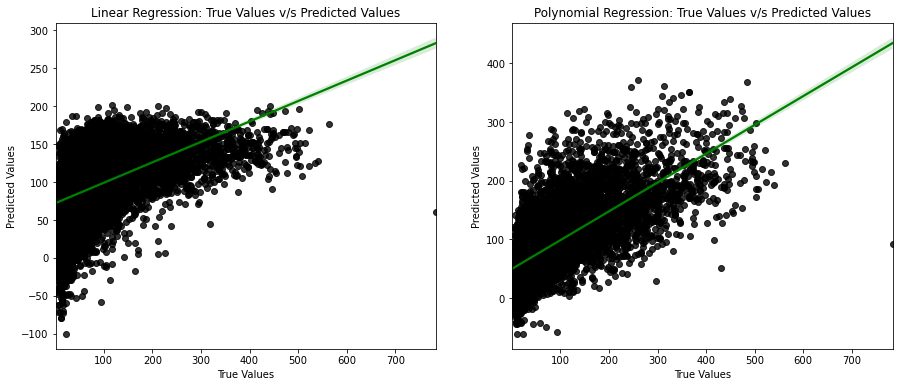

In [51]:
fig, axes = plt.subplots(1, 2, figsize = (15,6))

sns.regplot(y_o_test, y_o_test_pred, data = pollution_o, color = 'red', scatter_kws = {'color':'black'}, line_kws = {'color':'green'}, ax = axes[0]).set_title('Linear Regression: True Values v/s Predicted Values')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predicted Values')

sns.regplot(y_o_test, y_o_test_predict, data = pollution_o, color = 'red', scatter_kws = {'color':'black'}, line_kws = {'color':'green'}, ax = axes[1])
plt.title('Polynomial Regression: True Values v/s Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

These two regression plots show the comparison between the linear regression fitted values and the ploynomial regression fitted values. The difference is not large (as seen by a 20% increase in R-squared). However, it can be seen that the line is better fitted for the points in the polynomial regression since it goes through the middle of the cluster of points till the end (where the true values are close to 600 micrograms per cubic meter of air). On the other hand, the linear regression line is not as good a fit because it does not recorgnize the cluster of points at the curved end. and at the bottom-left of the graph.

Hence, the polynomial regression is betteere in this case because the points at the curved end are recognizeed by this regression making it s a slightly better fit.

---

##### Dataset without Outliers

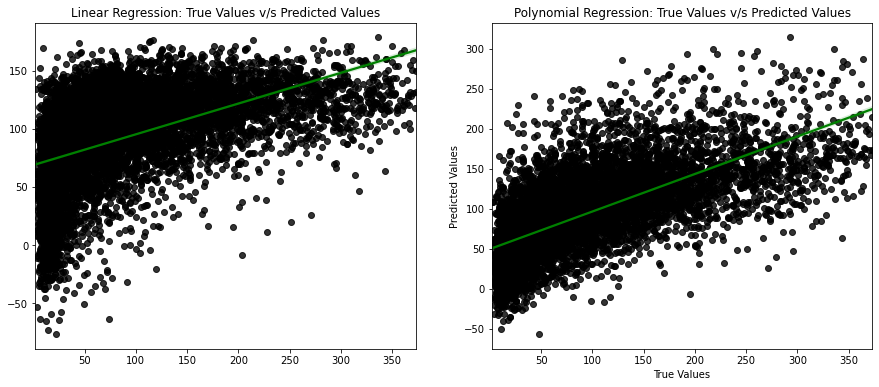

In [52]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))

sns.regplot(y_no_test, y_no_test_pred, data = pollution_o, color = 'red', scatter_kws = {'color':'black'}, line_kws = {'color':'green'}, ax = axes[0]).set_title('Linear Regression: True Values v/s Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

sns.regplot(y_no_test, y_no_test_predict, data = pollution_o, color = 'red', scatter_kws = {'color':'black'}, line_kws = {'color':'green'})
plt.title('Polynomial Regression: True Values v/s Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

These two regression plots are similar to the regression plots created with the datasets that had outliers. This is because the polynomial regression, in comparison to the linear regression, accounts for most of the clusters of points whereas, the linear regression does not account for the points at the curveed end of the graph.

However, the polynomial regression for this dataset is not accounting for all the curvature at the end as well as the polynomial regression of the dataset with outliers. This can be seen because the line passes over the bottom-right cluster of points (and not through it). Hence, we would recommend using the dataset with outliers. There is also more variability in the polynomial regression at the end of the graph which makes fitting a line over these points dificult. Hence, just looking at this graph, we can say that the polynomial regression with outliers is a better predictive model; however, as determined earlier, the model created without outliers has better accuracy as determined by the bias and variance.

---

## Conclusion

After running different regression models, using both with outliers and without outliers, the results of the different regression models shows that the dataset with outliers is a better fit for the prediction of the level of pollution based on different attributes of air quality. The polynomial model with outliers has better r-squared values than the ones without outliers. The final model has an r-square value of 0.48 for the training set and r-square value of 0.46 for the test set. These r-squared values between the training and test set are not much different. This means that the final model explains about 47% of the variation on the level of pollution is explained by the model.

However, this conclusion is solely based on looking at the R-squared value, which is not a good standard. When we conducted an analysis of bias and variance for these models, the bias is higher for the model with outliers in comparison to the model without outliers indicating that the model has lower accuracy. Further, the variance is higher in the model without outliers which indicates that there is a better bias and variance tradeoff in this polynomial model in comparison to the model with outleirs. Hence, looking at all statistics and standards, we would recommend using the polynomial model without outleirs because it has a better accuracy and predictive power and the difference in r-squared between the two models is too small to be significant. 

Additionally, there might be more variables in the dataset that is not explained, that could possibly cause the generally low r-squared

##### The used of the model in real-life situations 

This model can be used in different real-life situations to create a better living environment for the people, such as, be used in the purpose of creating a better and healthier environment. Some attributes of air quality are dangerous for health, therefore reducing pollution level means reducing hazard for humans and for the environment. 

##### Air Pollution and Economics

Economics are also related to air pollution level, infrastructure and sector contributes a lot to the economic growth of a particular country. These sectors also contribute to air pollution. Through creating a model predicting air pollution, this should be used in assessing cost and benefits of economic activity in relation to air pollution. Thus, creating policy that allows the economic activities to keep working, while keeping the air pollution low. If both still have a positive correlation, then we must see whether the cost is higher than the benefit. The higher the cost, the more consequences the earth have to face